<a href="https://colab.research.google.com/github/zzaeyun/ESAA22-2/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_303to310.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **04 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측**

- 사이킷런의 linear_models 모듈은 다양한 종류의 선형 기반 회귀를 클래스로 구현하여 제공
- LinearRegression 선형 회귀를 이용하여 보스턴 주택 가격 예측 회귀를 구현


---


### **LinearRegression 클래스 - Ordinary Least Squares**
- 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스
- fit( ) 메서드로 X, y 배열을 입력 받으면 회귀 계수(Coefficients)인 W를 coef_ 속성에 저장

In [ ]:
import sklearn
#class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

**입력 파라미터**
- fit_intercept: 불린 값으로, 디폴트는 True, intercept 값을 계산할 것인지 말지 지정
  -False: intercept가 사용되지 않고 0으로 지정
- normalize: 불린 값으로 디폴트는 False, fit_intercept가 False인 경우에는 파라미터가 무시 됨
  - True: 회귀를 수행하기 전에 입력 데이터 세트를 정규화

**속성**
- coef_: fit( ) 메서드를 수행했을 때 회귀 계수를 배열 형태로 저장하는 속성
- intercept_: intercept 값



---

Ordinary Least Squares 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받는다. 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해짐
- 이러한 현상을 다중 공선성(multi-colinearity) 문자로 함
- 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용
- 매우 많은 피처가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행하는 것도 고려해 볼 수 있음




---

### **회귀 평가 지표**
- 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심

- MAE: Mean Absolute Error (MAE)이며 실제 값과 예측값의 차이를 절댓값으로 변환해 평균한 것
- MSE: Mean Squared Error (MSE)이며 실제 값과 예측값의 차이를 제곱해 평균한 것
- RMSE: MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운 것이 RMSE(Root Mean Squared Error)
  - 사이킷런에서는 RMSE를 제공하지 않기 때문에 MSE에 루트를 씌워 사용
- R^2: 분산 기반으로 예측 성능을 평가. 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높습니다.

- 그 외에도 MSLE(Mean Squared Log Error), RMSLE(Root Mean Squared Log Error)





---
평가지표 API
- MAE: metrics.mean_absolute_error
- MSE: metrics.mean_squared_error
- R^2: metrics.r2_score

Scoring의 경우 값이 클수록 좋다고 판단하는데 평가지표의 경우 잘 예측할 수록 값이 작아지기 때문에 음수를 뜻하는 neg_를 앞에 붙여 scoring으로 판단하는 것




---

### **LinearRegression을 이용해 보스턴 주택 가격 회귀 구현**

- 보스턴 주택 가격 데이터는 사이킷런에 내장됨

**피처 값의 의미**

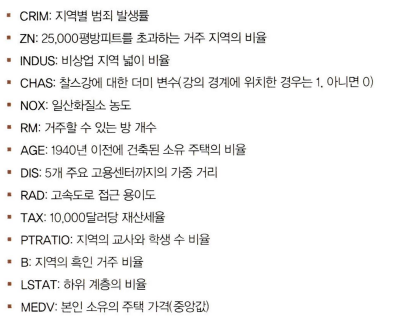

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston=load_boston()

bostonDF=pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE']=boston.target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


각 칼럼이 회귀 결과에 미치는 영향을 시각화하여 알아보기

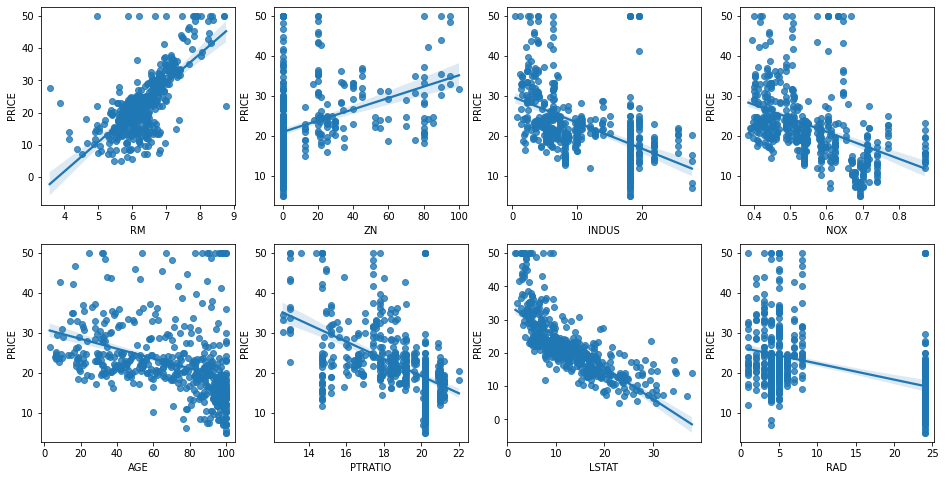

In [3]:
fig, axs=plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features=['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col=i%4

  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr=LinearRegression()
lr.fit(X_train, y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 17.297, RMSE : 4.158956
Variance score : 0.757


In [5]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:',np.round(lr.coef_, 1))

절편 값: 40.99559517216477
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [7]:
coeff=pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

최적화를 수행하면서 coefficients 변화 살펴보기

cross_val_score( ) 를 이용해 교차 검증으로 MSE와 RMSE 측정

In [9]:
from sklearn.model_selection import cross_val_score
y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr=LinearRegression()

neg_mse_scores=cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores,2))
print('5 folds 의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds 의 개별 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds 의 개별 RMSE : 5.829
